# Necessary Libraries

In [150]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
import seaborn as sns

# Load Data

In [3]:
# load the train data
train_data = pd.read_csv("train_dataset.csv")

# Explore the data

In [4]:
# see some lines
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# get the number of data columns and rows
train_data.shape

(614, 13)

In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

this column is ID column: no need for it (no real change on the model prediction):
    
    Loan_ID

## Delete ID column

In [10]:
train_data.drop('Loan_ID', inplace=True, axis=1)

In [11]:
train_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Split the dataset by dataset type (category and numaric)

In [12]:
train_numaric = train_data.select_dtypes(include=['int64', 'float64']).copy()
train_cetagory = train_data.select_dtypes(include=['object']).copy()

# Feature Engineering 

## Numaric Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC765A4340>,
      dtype=object)

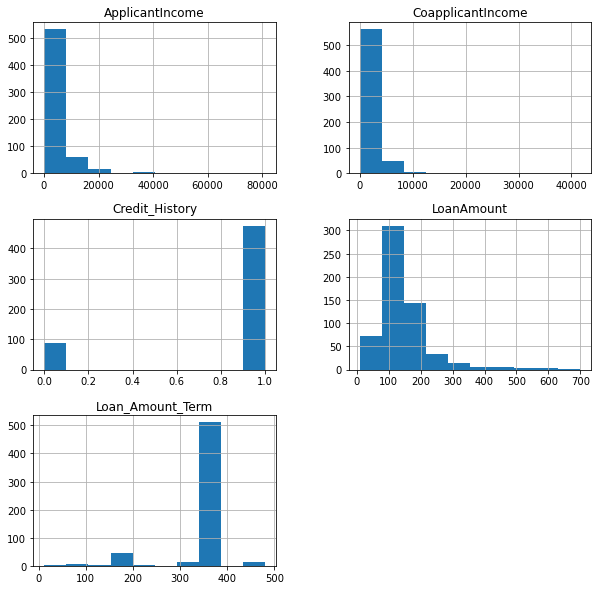

In [13]:
# Display the histogram for the numaric data
train_numaric.hist(figsize=(10,10))

* Credit_History column is a category data but display in numaric form
* noticed that there are no scalling. so we are going to scalling the data

In [14]:
train_numaric = train_numaric.drop('Credit_History', axis=1)
train_cetagory['Credit_History'] = train_data.Credit_History

### Missing values

In [15]:
train_numaric.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
dtype: int64

In [16]:
for col in train_numaric.columns:
    train_data[col] = train_data[col].fillna(train_data[col].mean())

train_numaric = train_numaric.fillna(train_numaric.mean())

In [17]:
train_data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Scaling

In [18]:
for col in train_numaric.columns:
    train_data[col] = (train_numaric[col]-train_numaric[col].mean())/train_numaric[col].std()

train_numaric = (train_numaric-train_numaric.mean())/train_numaric.std()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC772B83D0>,
      dtype=object)

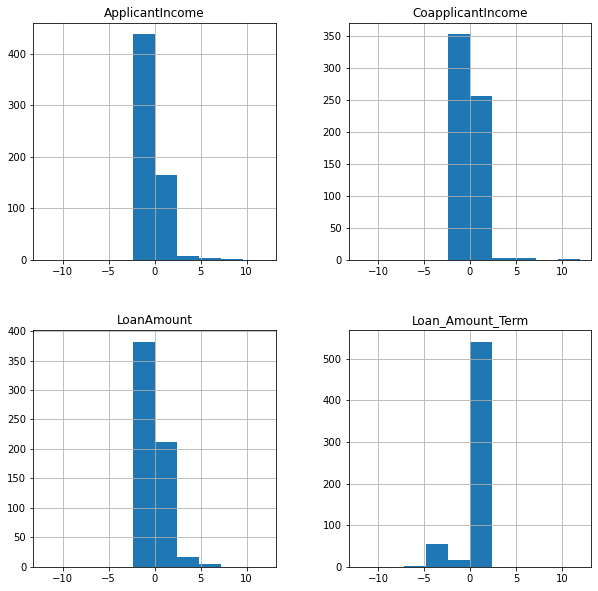

In [19]:
train_numaric.hist(figsize=(10,10),range=[-12, 12])

## Category Data

### Missing values 

In [20]:
train_cetagory.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Property_Area      0
Loan_Status        0
Credit_History    50
dtype: int64

this columns has nan values -> need to handle them by replacing the Nan with the frequency value:

    Gender, Dependents, Self_Employed, Credit_History: frequency value

    Married: Last/Next value
    

#### Handle Married Column

In [21]:
married_missing = train_cetagory["Married"][train_cetagory["Married"].isna()] 
for i in married_missing.keys():
    train_cetagory["Married"].iloc[i] = train_cetagory["Married"].iloc[i-1]

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Handle other columns missing value

In [22]:
for i in train_cetagory.columns:
    frequency = train_cetagory[i].mode()[0]
    train_cetagory[i].fillna(frequency, inplace=True)

In [23]:
train_cetagory.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Property_Area     0
Loan_Status       0
Credit_History    0
dtype: int64

#### Save the changes to train_data set

In [24]:
for cat in train_cetagory:
    train_data[cat] = train_cetagory[cat]

In [25]:
train_data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Handle Category data to Numaric

In [26]:
train_cetagory.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
0,Male,No,0,Graduate,No,Urban,Y,1.0
1,Male,Yes,1,Graduate,No,Rural,N,1.0
2,Male,Yes,0,Graduate,Yes,Urban,Y,1.0
3,Male,Yes,0,Not Graduate,No,Urban,Y,1.0
4,Male,No,0,Graduate,No,Urban,Y,1.0


In [27]:
for col in train_cetagory.columns:
    print(train_cetagory[col].unique())

['Male' 'Female']
['No' 'Yes']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']
['Y' 'N']
[1. 0.]


In [28]:
# column need labeling
label_column = ["Married", "Education", "Self_Employed", "Loan_Status", "Credit_History"]

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in the same column
for column in label_column:
    train_data[column] = labelencoder.fit_transform(train_data[column])

train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,0,0,0,0,0.072931,-0.554036,3.382028e-16,0.279623,1,Urban,1
1,Male,1,1,0,0,-0.134302,-0.038700,-2.190947e-01,0.279623,1,Rural,0
2,Male,1,0,0,1,-0.393427,-0.554036,-9.568608e-01,0.279623,1,Urban,1
3,Male,1,0,1,0,-0.461686,0.251774,-3.142903e-01,0.279623,1,Urban,1
4,Male,0,0,0,0,0.097649,-0.554036,-6.440178e-02,0.279623,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0,0,0,-0.409796,-0.554036,-8.973636e-01,0.279623,1,Rural,1
610,Male,1,3+,0,0,-0.212383,-0.554036,-1.266247e+00,-2.516603,1,Rural,1
611,Male,1,1,0,0,0.436818,-0.472019,1.268337e+00,0.279623,1,Urban,1
612,Male,1,2,0,0,0.356773,-0.554036,4.829731e-01,0.279623,1,Urban,1


In [29]:
ohe = OneHotEncoder(sparse=False)

ohe_data = ohe.fit_transform(train_data[["Gender", "Dependents", "Property_Area"]])

transformed_df = pd.DataFrame(
    ohe_data,
    columns=ohe.get_feature_names(["Gender", "Dependents", "Property_Area"])
)

In [30]:
# merge one-hot encoded columns with original DataFrame
train_data = train_data.join(transformed_df)

# Drop the Original Categorical Variable
train_data = train_data.drop(["Gender", "Dependents", "Property_Area"], axis=1)

In [31]:
train_data

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,0.072931,-0.554036,3.382028e-16,0.279623,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,0,-0.134302,-0.038700,-2.190947e-01,0.279623,1,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,1,-0.393427,-0.554036,-9.568608e-01,0.279623,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,1,0,-0.461686,0.251774,-3.142903e-01,0.279623,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0.097649,-0.554036,-6.440178e-02,0.279623,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,-0.409796,-0.554036,-8.973636e-01,0.279623,1,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
610,1,0,0,-0.212383,-0.554036,-1.266247e+00,-2.516603,1,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
611,1,0,0,0.436818,-0.472019,1.268337e+00,0.279623,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
612,1,0,0,0.356773,-0.554036,4.829731e-01,0.279623,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
train_data.isna().sum()

Married                    0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [33]:
train_data.dtypes

Married                      int32
Education                    int32
Self_Employed                int32
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int32
Gender_Female              float64
Gender_Male                float64
Dependents_0               float64
Dependents_1               float64
Dependents_2               float64
Dependents_3+              float64
Property_Area_Rural        float64
Property_Area_Semiurban    float64
Property_Area_Urban        float64
dtype: object

# Create, Train and Test dataset

## Linear Regression Model

Pridict the Loan Amount

In [34]:
# Split the predict feature from the dataset
features = train_data.loc[:, train_data.columns != "LoanAmount"]
target_feature = train_data["LoanAmount"]

x_train, x_test, y_train, y_test = train_test_split(features, target_feature, test_size=0.3, train_size=0.7, random_state=100)


print("length of the total data is ",len(features))
print("length of the train data is ",len(x_train))
print("length of the test data is is ",len(x_test))

length of the total data is  614
length of the train data is  429
length of the test data is is  185


In [35]:
# Create Linear Regression model object
reg = linear_model.LinearRegression()

# Train the model by the training set
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
# Print the coefficient for each feature
reg.coef_

array([ 0.10604457, -0.19954319,  0.18557367,  0.47702647,  0.37058964,
        0.10784052,  0.274975  , -0.21795588, -0.03700338,  0.03700338,
       -0.08011542, -0.00982494, -0.01290645,  0.1028468 ,  0.03823428,
        0.0116896 , -0.04992388])

In [37]:
# Show the intercept of the model, its a constraint number (w0)
reg.intercept_

-0.10963401641750009

In [38]:
# Apply trained model to predict target from the training set

target_predict_train = reg.predict(x_train)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, target_predict_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, target_predict_train))

Mean squared error (MSE): 0.58
Coefficient of determination (R^2): 0.36


In [39]:
# Apply trained model to predict target from the test set

target_predict = reg.predict(x_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, target_predict))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, target_predict))

Mean squared error (MSE): 0.69
Coefficient of determination (R^2): 0.43


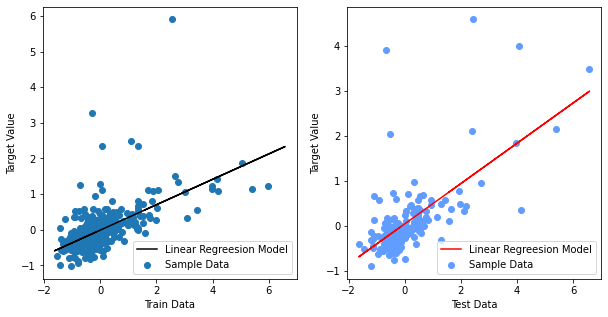

In [47]:
# Scatter Plot of experimental vs. predicted target
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

# 1 row, 2 column, plot 1
plt.scatter(x=y_train, y=target_predict_train, label="Sample Data")

# Add trendline
z = np.polyfit(y_train, target_predict_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"black", label="Linear Regreesion Model")

plt.ylabel('Target Value')
plt.xlabel('Train Data')
plt.legend()

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=target_predict, c="#619CFF", label="Sample Data")

z = np.polyfit(y_test, target_predict, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"red", label="Linear Regreesion Model")

plt.ylabel('Target Value')
plt.xlabel('Test Data')
plt.legend()
plt.show()

## Logistic Regression

Pridict the ApplicantI ncome based on Self_Employed

In [91]:
Logistic_Features = train_data.loc[:, train_data.columns != "Self_Employed"]
Logistic_Target = train_data["Self_Employed"]

Logistic_x_train, Logistic_x_test, Logistic_y_train, Logistic_y_test = train_test_split(Logistic_Features, Logistic_Target, random_state=100)


print("length of the total data is ",len(Logistic_Features))
print("length of the train data is ",len(Logistic_x_train))
print("length of the test data is is ",len(Logistic_x_test))

length of the total data is  614
length of the train data is  460
length of the test data is is  154


In [92]:
Logistic_Model = linear_model.LogisticRegression(random_state=0)

In [93]:
Logistic_Model.fit(Logistic_x_train, Logistic_y_train)

LogisticRegression(random_state=0)

In [94]:
Logistic_Model.classes_

array([0, 1])

In [95]:
Logistic_Model.intercept_

array([-1.75452795])

In [96]:
Logistic_Model.coef_

array([[-0.30886933,  0.2212313 ,  0.12465602,  0.12717541,  0.23503127,
        -0.01171191,  0.4170727 , -0.09855395,  0.02279203, -0.02280065,
        -0.53474522,  0.27699821,  0.1713987 ,  0.08633969,  0.14000391,
        -0.06537182, -0.07464071]])

In [98]:
# check the model performance
# returns the matrix of probabilities that the predicted output is equal to zero or one
Logistic_Model.predict_proba(Logistic_x_test)

array([[0.6796888 , 0.3203112 ],
       [0.71366441, 0.28633559],
       [0.83595457, 0.16404543],
       [0.85709231, 0.14290769],
       [0.71647357, 0.28352643],
       [0.81254144, 0.18745856],
       [0.77673661, 0.22326339],
       [0.86231364, 0.13768636],
       [0.92949879, 0.07050121],
       [0.89740371, 0.10259629],
       [0.90197245, 0.09802755],
       [0.86540122, 0.13459878],
       [0.81691559, 0.18308441],
       [0.91515304, 0.08484696],
       [0.81057353, 0.18942647],
       [0.77648139, 0.22351861],
       [0.79695741, 0.20304259],
       [0.87129534, 0.12870466],
       [0.91647599, 0.08352401],
       [0.92010874, 0.07989126],
       [0.91964473, 0.08035527],
       [0.79195151, 0.20804849],
       [0.91082991, 0.08917009],
       [0.91684144, 0.08315856],
       [0.85977141, 0.14022859],
       [0.93117111, 0.06882889],
       [0.90069691, 0.09930309],
       [0.85729387, 0.14270613],
       [0.85471579, 0.14528421],
       [0.91510929, 0.08489071],
       [0.

In [143]:
Logistic_Predict_target = Logistic_Model.predict(Logistic_x_test)

In [144]:
# Evaluate the model
Logistic_Model.score(Logistic_x_train, Logistic_y_train)

0.8543478260869565

In [145]:
Logistic_Model.score(Logistic_x_test, Logistic_y_test)

0.8831168831168831

In [153]:
Logistic_Confusion_Matrix = confusion_matrix(Logistic_y_test, Logistic_Predict_target)

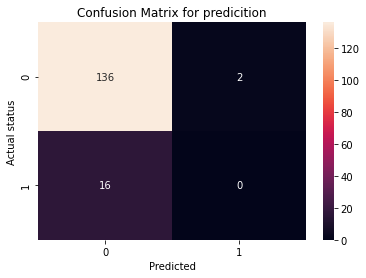

In [167]:
ax = sns.heatmap(Logistic_Confusion_Matrix, annot=True, fmt='d')

ax.set_title('Confusion Matrix for predicition')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual status')

## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()